### Regression with Perceptron

**Build Neural Network model with single perceptron**

The general methodology to build a neural network is to:
- Define the neural network structure(# of input units, # of hidden units etc)
- Initialize the model's parameters (weights and bais)
- Loop:
    - implement forward propagation (calculate the perceptron output)
    - implement backward propagation (to get the required corrections for the parameters).
    - update the parameters.
- Make predictions

In [54]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
np.random.seed(3)

In [2]:
data = pd.read_csv(r'C:\Users\207498\OneDrive - IBS Software Pvt Ltd\Desktop\my_work\Python\python_training\DS\MATHS\tvmarketing.csv')

In [3]:
data.head()

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9


<Axes: xlabel='TV', ylabel='Sales'>

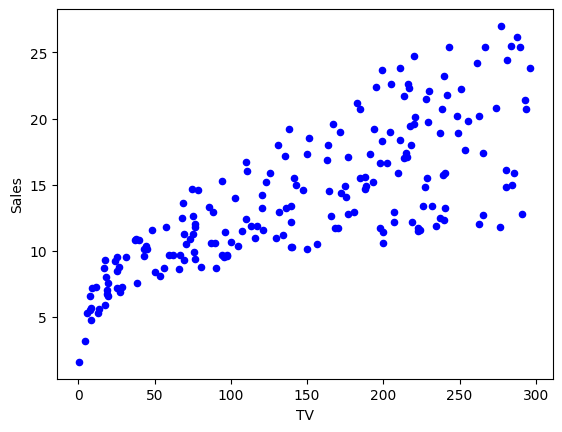

In [4]:
data.plot(x='TV',y='Sales',kind='scatter',color='blue')

In [9]:
#column-wise normalization can be done for all the fields at once
#Apply normalization to bring them into same unit
X_norm = (data['TV'] - np.mean(data['TV'])) / np.std(data['TV'])
Y_norm = (data['Sales'] - np.mean(data['Sales'])) / np.std(data['Sales'])

In [10]:
print(X_norm.shape)
print(Y_norm.shape)

(200,)
(200,)


In [11]:
print(X_norm)

0      0.969852
1     -1.197376
2     -1.516155
3      0.052050
4      0.394182
         ...   
195   -1.270941
196   -0.617035
197    0.349810
198    1.594565
199    0.993206
Name: TV, Length: 200, dtype: float64


In [12]:
X_norm = np.array(X_norm).reshape((1, len(X_norm)))
Y_norm = np.array(Y_norm).reshape((1, len(Y_norm)))
print(X_norm.shape,Y_norm.shape)

(1, 200) (1, 200)


In [145]:
X_norm

array([[ 0.96985227, -1.19737623, -1.51615499,  0.05204968,  0.3941822 ,
        -1.61540845, -1.04557682, -0.31343659, -1.61657614,  0.61604287,
        -0.94515567,  0.79002835, -1.4390876 , -0.57850171,  0.66625345,
         0.56466461, -0.92530498,  1.56887609, -0.90895735,  0.0030068 ,
         0.8332328 ,  1.05509347, -1.5628625 ,  0.94883389, -0.98952781,
         1.35285385, -0.04837147,  1.08662104,  1.18820988, -0.89260972,
         1.70316018, -0.3986778 , -0.58200477,  1.38438142, -0.59952009,
         1.67747105,  1.39956136, -0.84473452, -1.21372386,  0.94533082,
         0.64757044,  0.34981006,  1.711334  ,  0.6989487 , -1.42390765,
         0.327624  , -0.66958136,  1.08428567,  0.93598932, -0.93581417,
         0.61604287, -0.54463877,  0.80987904,  0.41520058,  1.35051848,
         0.60553368, -1.63175608, -0.12660655,  0.74448853,  0.74332084,
        -1.09228433,  1.33417085,  1.07727954, -0.51778195, -0.18615862,
        -0.91129272, -1.34917564, -0.09040823,  1.0

### Implementing of the Neural Network Model for Linear Regression

Neural Network Model with a single Perceptron and one input node

**Defining the Neural Network Structure** 

n_x : the size of the input layer<br>
n_y : the size of the output layer

In [14]:
def layer_sizes(X,Y):
    """    
    Args:
        X (series): input dataset 
        Y (series): label
        
        returns:
        n_x : the size of the input layer 
        n_y : the size of the output layer
    """
    n_x = X.shape[0]
    n_y = Y.shape[0]
    
    return (n_x,n_y)
(n_x, n_y) = layer_sizes(X_norm,Y_norm)
print('The size of input layer: ',n_x)
print('The size of output layer: ',n_y)

The size of input layer:  1
The size of output layer:  1


**Initialize the model's parameters**

initializing the weights array of shape(n_x * n_y) = (1 * 1) with random values and the bias vector of shape (n_y * 1) = (1 * 1)

In [124]:
def initialize_parameters(n_x,n_y):
    """
        returns :
            w : weight matrix of shape(n_y,n_x)
            b : bais value set as a vector of shape (n_y,1)
    """
    w = np.random.randn(n_y,n_x) * 0.01
    b = np.zeros((n_y, 1))
    
    parameters = {
        'W':w,
        'b':b
    }
    return parameters

parameters = initialize_parameters(n_x,n_y)
print('W',parameters['W'])
print('b',parameters['b'])

W [[0.00122219]]
b [[0.]]


**The Loop**

Implement forward_propagation()

In [125]:
def forward_propagation(X,parameters):
    """_summary_
        X : input data of size(n_x, m)
        parameters : dictionary containing weights and bias
        
        return: 
        y_hat : the output
    """
    W = parameters['W']
    b = parameters['b']
    
    #forward propagation to calculate Z
    Z = np.matmul(W,X)+b
    Y_hat = Z
    return Y_hat

Y_hat = forward_propagation(X_norm,parameters)
print('Some elements of output vector y_hat: ',Y_hat[0,0:5])

Some elements of output vector y_hat:  [ 1.18534534e-03 -1.46342323e-03 -1.85303197e-03  6.36146871e-05
  4.81766191e-04]


Define cost function which will be used to train the model

In [126]:
def compute_cost(Y_hat,Y):
    #number of examples
    """
    Args:
        Y_hat : predicted value 
        Y : actual value
        
    returns:
    cost : sum of squares scaled by 1/(2*number of examples)
    """
    m = Y_hat.shape[1]
    cost = np.sum((Y_hat-Y)**2)/(2*m)
    
    return cost

print('Cost = ',compute_cost(Y_hat,Y_norm))

Cost =  0.49904471871398365


In [128]:
def backward_propagation(Y_hat, X, Y):
    """Implements the backward propagation for calculating garadients

    Args:
        Y_hat: predicted values
        X : input values
        Y: actual values
        
    Returns:
        gards: dictionary containing gradients with respect to different parameters
    """
    m = X.shape[1]
    dZ = Y_hat - Y
    dW = 1/m * np.dot(dZ,X.T)
    db = 1/m * np.sum(dZ,axis=1,keepdims=True)
    
    grads = {
        'dW' : dW,
        'db' : db}
    
    return grads
grads = backward_propagation(Y_hat,X_norm,Y_norm)
print('dW = ',grads['dW'])
print('db = ',grads['db'])

dW =  [[-0.78100223]]
db =  [[1.77635684e-16]]


In [129]:
def update_parameters(parameters:dict,grads:dict,learning_rate:float=1.2):
    """Update parameters using the gradient descent rule

    Args:
        parameters : dict containing parameter w and b
        grads : dict containing grads (dW, db)
        learning_rate (int, optional): _description_. Defaults to 1.
    """
    W = parameters['W']
    b = parameters['b']
    
    dW = grads['dW']
    db = grads['db']
    
    W = W - learning_rate * dW
    b = b - learning_rate * db
    
    parameters = {
        'W' : W,
        'b' : b
    }
    return parameters

parameters_updated = update_parameters(parameters, grads)

print("W updated = ",parameters_updated["W"])
print("b updated = " ,parameters_updated["b"])

W updated =  [[0.93842487]]
b updated =  [[-2.13162821e-16]]


### Integrate the function in nn_model() and make predictions

In [132]:
def nn_model(X, Y, num_iterations=10,learning_rate=1.2,print_cost=False):
    """
    Args:
        X : input dataset of shape (n_x,number of examples) 
        Y : labels of shape (n_y, number of examples)
        num_iterations (int, optional): number of iteration in the loop. Defaults to 10.
        learning_rate (float, optional): learning rate for gradient descent. Defaults to 1.2.
        print_cost (bool, optional): if True, print the cost every iteration. Defaults to False.
        
        Returns:
        parameters : parameters learnt by the model. They can be used to make predictions. 
    """
    n_x, n_y = layer_sizes(X,Y)
    
    parameters = initialize_parameters(n_x,n_y)
    
    for i in range(0,num_iterations):
        
        #forward propagation
        Y_hat = forward_propagation(X,parameters)
        
        #cost function
        cost = compute_cost(Y_hat,Y)
        
        #backward propagation
        grads = backward_propagation(Y_hat,X,Y)
        
        #gradient descent parameter update
        parameters = update_parameters(parameters,grads,learning_rate)
        
        #print the cost every iterations
        if print_cost:
            print(f"Cost after iteration {i}, {cost} ")
            
    return parameters

In [133]:
parameters_simple_lr = nn_model(X_norm,Y_norm,num_iterations=30,learning_rate=1.2,print_cost=True)
print('W = ',parameters_simple_lr['W'])
print('b = ',parameters_simple_lr['b'])

Cost after iteration 0, 0.5047133474609289 
Cost after iteration 1, 0.2064885094904031 
Cost after iteration 2, 0.19455951597158205 
Cost after iteration 3, 0.1940823562308292 
Cost after iteration 4, 0.19406326984119912 
Cost after iteration 5, 0.1940625063856139 
Cost after iteration 6, 0.19406247584739048 
Cost after iteration 7, 0.19406247462586154 
Cost after iteration 8, 0.19406247457700038 
Cost after iteration 9, 0.1940624745750459 
Cost after iteration 10, 0.19406247457496775 
Cost after iteration 11, 0.19406247457496462 
Cost after iteration 12, 0.19406247457496448 
Cost after iteration 13, 0.19406247457496448 
Cost after iteration 14, 0.19406247457496448 
Cost after iteration 15, 0.1940624745749645 
Cost after iteration 16, 0.19406247457496448 
Cost after iteration 17, 0.1940624745749645 
Cost after iteration 18, 0.19406247457496448 
Cost after iteration 19, 0.19406247457496448 
Cost after iteration 20, 0.19406247457496448 
Cost after iteration 21, 0.19406247457496448 
Cost 

In [170]:
def predict(X,Y,parameters,X_pred):
    W = parameters['W']
    b = parameters['b']
    
    if isinstance(X, pd.Series):
        X_mean = np.mean(X)
        X_std = np.std(X)
        X_pred_norm = ((X_pred - X_mean)/X_std).reshape(1,len(X_pred))
    else:
        X_mean = np.array(np.mean(X,axis=0)).reshape((len(X.axes[1]),1))
        X_std = np.array(np.std(X,axis=0)).reshape((len(X.axes[1]),1))
        X_pred_norm = ((X_pred - X_mean)/X_std)
        
    Y_pred_norm = np.matmul(W,X_pred_norm) + b
    
    Y_pred = Y_pred_norm * np.std(Y) + np.mean(Y)
    
    return Y_pred[0]

X_pred = np.array([50, 120, 280])
Y_pred = predict(data["TV"], data["Sales"], parameters_simple_lr, X_pred)
print(f"TV marketing expenses:\n{X_pred}")
print(f"Predictions of sales:\n{Y_pred}")

TV marketing expenses:
[ 50 120 280]
Predictions of sales:
[ 9.40942557 12.7369904  20.34285287]


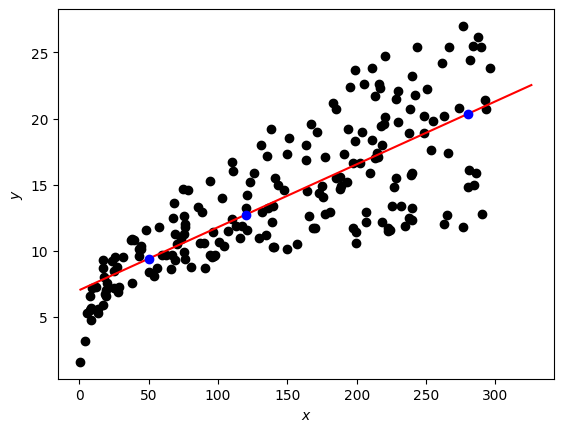

In [135]:
fig, ax = plt.subplots()
plt.scatter(data["TV"], data["Sales"], color="black")

plt.xlabel("$x$")
plt.ylabel("$y$")
    
X_line = np.arange(np.min(data["TV"]),np.max(data["TV"])*1.1, 0.1)
Y_line = predict(data["TV"], data["Sales"], parameters_simple_lr, X_line)
ax.plot(X_line, Y_line, "r")
ax.plot(X_pred, Y_pred, "bo")
plt.plot()
plt.show()